In [100]:
import warnings;
import skfda
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [101]:
import pandas as pd
from fbprophet import Prophet
import pickle
import datetime

# 1. Read in Data and Process Dates

Data set:    [[[-0.06657371]
  [-0.04981095]
  [-0.03310659]
  ...
  [ 0.30050689]
  [ 0.29790122]
  [ 0.29532761]]

 [[-0.06859129]
  [-0.05126447]
  [-0.03399733]
  ...
  [ 0.34696373]
  [ 0.3452061 ]
  [ 0.34347831]]

 [[-0.06907575]
  [-0.05180134]
  [-0.03458674]
  ...
  [ 0.29794357]
  [ 0.29523921]
  [ 0.29256932]]

 ...

 [[-0.06941363]
  [-0.05187886]
  [-0.03440303]
  ...
  [ 0.3007645 ]
  [ 0.2992479 ]
  [ 0.29778421]]

 [[-0.0683659 ]
  [-0.05090044]
  [-0.03349436]
  ...
  [ 0.29501561]
  [ 0.2934691 ]
  [ 0.29197409]]

 [[-0.06950268]
  [-0.05196727]
  [-0.03449072]
  ...
  [ 0.31945081]
  [ 0.31838454]
  [ 0.3173658 ]]]
grid_points:    (array([ 43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,

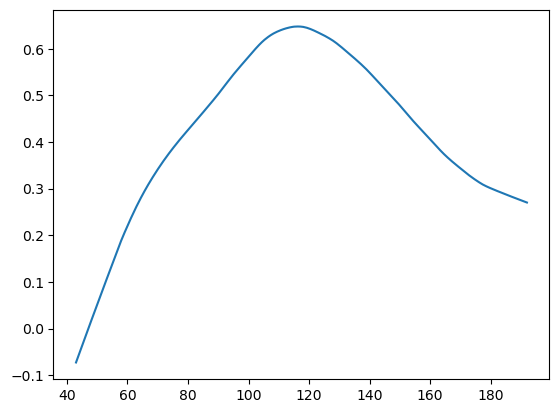

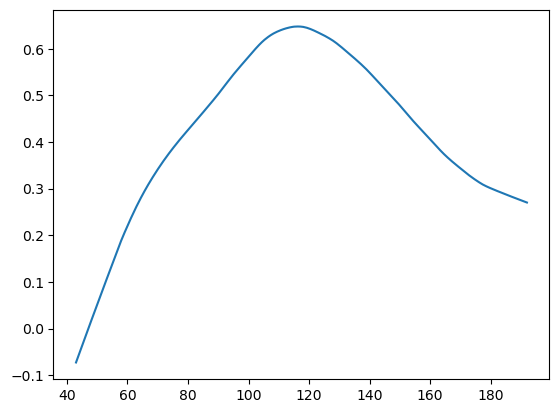

In [102]:
with open('hdvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
print(NDVI)
NDVI[30].plot()

In [103]:
rangeForNewDate = range(43,193)

scostamento = 70

rangeForNewDate2 = range(43,193-scostamento) # Pixel di prova per fare predizione
days = []
zeroDay = datetime.datetime.strptime("2017-01-01","%Y-%m-%d")
days2 = []


for a in rangeForNewDate2:
    days2.append((zeroDay + datetime.timedelta(days=a)))
serie2 = NDVI[120].data_matrix.flatten()[:-(scostamento)]

for a in rangeForNewDate:
    days.append((zeroDay + datetime.timedelta(days=a)))
serie = NDVI[40].data_matrix.flatten()


d = {'ds': days, 'y': serie}
data = pd.DataFrame(data=d)
d2 = {'ds': days2, 'y': serie2}
data2 = pd.DataFrame(data=d2)

In [104]:
data.head()

,ds,y
0,2017-02-13,-0.072685
1,2017-02-14,-0.054671
2,2017-02-15,-0.036719
3,2017-02-16,-0.018831
4,2017-02-17,-0.001009


# 2. Train Model

In [105]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(data2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


# 3. Forecast Away

In [106]:
future = m.make_future_dataframe(periods=scostamento,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-02-13,-0.004083,-0.075042,-0.064771,-0.004083,-0.004083,-0.065796,-0.065796,-0.065796,-0.065319,-0.065319,-0.065319,-0.000477,-0.000477,-0.000477,0.0,0.0,0.0,-0.069879
1,2017-02-14,0.013064,-0.057722,-0.048132,0.013064,0.013064,-0.065880,-0.065880,-0.065880,-0.065319,-0.065319,-0.065319,-0.000561,-0.000561,-0.000561,0.0,0.0,0.0,-0.052816
2,2017-02-15,0.030210,-0.041341,-0.030515,0.030210,0.030210,-0.066084,-0.066084,-0.066084,-0.065319,-0.065319,-0.065319,-0.000765,-0.000765,-0.000765,0.0,0.0,0.0,-0.035873
3,2017-02-16,0.047357,-0.022640,-0.012070,0.047357,0.047357,-0.064768,-0.064768,-0.064768,-0.065319,-0.065319,-0.065319,0.000552,0.000552,0.000552,0.0,0.0,0.0,-0.017411
4,2017-02-17,0.064504,-0.005782,0.005100,0.064504,0.064504,-0.064760,-0.064760,-0.064760,-0.065319,-0.065319,-0.065319,0.000559,0.000559,0.000559,0.0,0.0,0.0,-0.000256


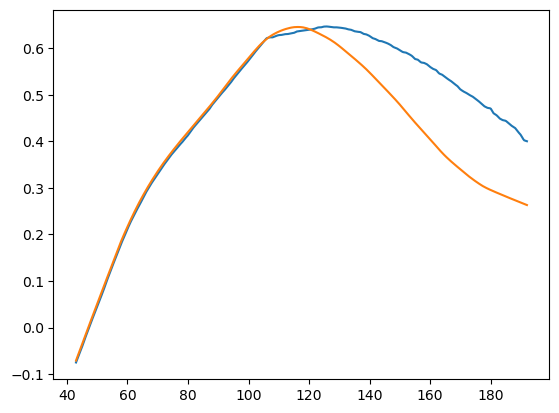

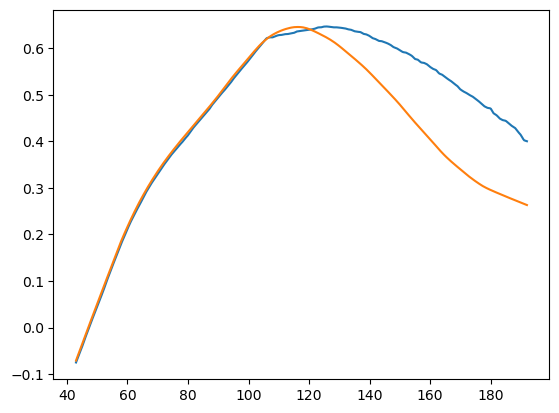

In [107]:
#plot1 = m.plot(forecast)

compare = skfda.FDataGrid(
    data_matrix=[forecast['yhat_lower'],NDVI[120].data_matrix.flatten()],
    grid_points=range(43,193),
)
compare.plot()

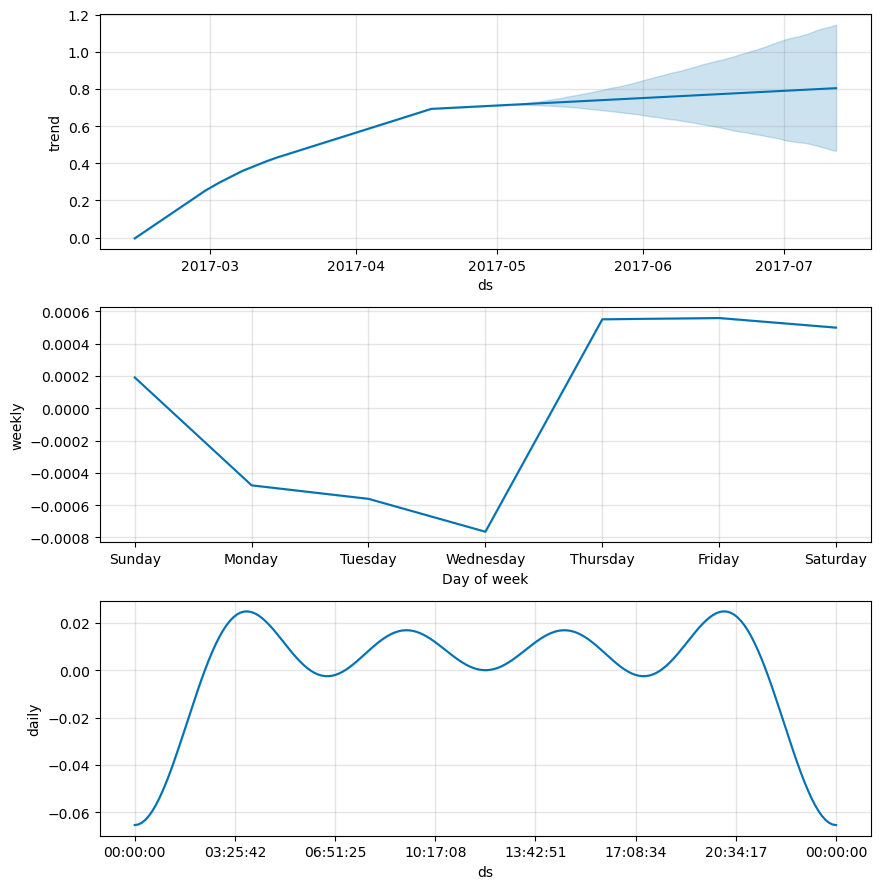

In [108]:
plt2 = m.plot_components(forecast)